## Problem Set 4 Choose Your Own Adventure

### BY: VENKAT SRINIDHI VADDY (2173456, vvaddy@uw.edu)

### Selecting a Dataset

SOURCE: UCI Machine Learning Repository
DATASET: Breast Cancer Wisconsin (Diagnostic) Data Set
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

The dataset is also available on Kaggle datasets in CSV file. 
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/code

### Selecting a model

Decision Tree

Random Forest


### Q.1 Describe the dataset you chose. Why did you choose it? What features does it include? What year is it from? How was it collected? What should we know about this dataset as we read your writeup? (4pts)

The dataset that I chose is the Breast Cancer Wisconsin Diagnostic Data set from the UCI Machine Learning Repository. The data is also available on Kaggle Datasets in CSV file. 

I chose this data as I have deep interest in biomedical and healthcare data. Personally as well, with a family history of cancer and after losing my grandmother to this disease, I find it extremely important that we need to have accurate models and classifiers to predict the type of cancer accurately for correct treatment to be administered. This project was a personal attempt in trying to contribute towards a disease that has taken so many lives and for which there is no cure. It is therefore imperative to understand the characteristics of cancer cells, analyze the most significant factors and variables and thus, predict the class of cancer to stop or prevent it as much as one can. 

Many a times, false negative reports can be given, that is, actual malignant tumor predicted as benign. This can be harmful as if predicted benign, the patient won't receive the proper care and medication required. I took this project to build a model that will reduce false negatives and give very high accuracy in breast cancer tumor prediction. 

FEATURES:

1) ID number - which is unique to every observation
2) Diagnosis (M = malignant, B = benign) - two classes to be predicted into

Ten real-valued features are computed for each cell nucleus: 

1) radius (mean of distances from center to points on the perimeter) 
2) texture (standard deviation of gray-scale values) 
3) perimeter of the cell nucleus
4) area  of the cell nucleas
5) smoothness (local variation in radius lengths) 
6) compactness (perimeter^2 / area - 1.0) 
7) concavity (severity of concave portions of the contour) 
8) concave points (number of concave portions of the contour) 
9) symmetry 
10) fractal dimension ("coastline approximation" - 1)


The data was collected in and released in 1995 by the creators - Dr. William H. Wolberg, General Surgery Dept. 
University of Wisconsin, W. Nick Street, Computer Sciences Dept. University of Wisconsin and Olvi L. Mangasarian, Computer Sciences Dept. 

#### How was the data collected?
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass from the patients. They describe characteristics of the cell nuclei present in the image. 

#### What to know about this dataset in the writeup?


There are total 31 features in the dataset even though there are just 1- real-values features as mentioned above. . For each of the feature, there is a column with the mean, se and worst values for the features and we will analyze the relationship between all.

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius. All feature values are recoded with four significant digits.


### Q.2 Define a research question. What are you trying to predict? Describe what you're trying to accomplish (it will differ between Supervised and Unsupervised learning). (4pts)

Research Question: Develop and deploy a model to analyze and predict the class of the breast cancer mass into benign or malignant tumor using the nuclei characteristics as the features/predictor variables with the highest accuracy. 

Trying to predict: through this research question and the model developed, I'm trying to predict the class and accurately classify breast tumor masses into two classes - benign and malignant. 

We have labelled data. Therefore this is a supervised learning classification problem. I'm trying to train a model and use it to predict on test data to then hypertune the model and get the best accuracy. In this project, I'll also tinker with the parameters to check which bring the higher accuracy and reduce overfitting. 

For this model, I have picked decision tree and random forest as the choice of model. 

### Q.3 Why is this algorithm a good way of answering your research question? (2pts)

For this model, I have picked decision tree and random forest as the choice of model. These are models which can be used for both supervised and unsupervised learning. They don't require feature scaling and reduce overfitting by reducing the variance. Through cross validation, we select the best parameters. 

Moreover, it forces the consideration of all possible outcomes of a decision and traces each path to a conclusion.

Random forest trains and improves the weak learners and creates strong learners from a set of decision trees. Additionally, one of the biggest advantages of random forest is its versatility. It can be used for both regression and classification tasks, and it's also easy to view the relative importance it assigns to the input features - which will reveal to us which features are most significant in cancer tumors and have the greatest impact. 


### Q.4 Using the data you chose and the algorithm you chose, read in your data and run your model. (6pts)


In [249]:
#loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)

In [250]:
#reading the data
data = pd.read_csv('data.csv')

print(data.shape)

#printing the data
data.head()


(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The dataset has 569 entries and 33 columns - one is the id, one is the response column and the others are the feature columns

In [251]:
#checking for null values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The last column has all null values. Therefore, it can be eliminated. 

In [252]:
# removing the last column as it is empty
data = data.drop('Unnamed: 32', axis = 1)
print(data.shape)

(569, 32)


In [253]:
#describing the data to get some statistical metrics
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The mean readius is 28.11 in cancerous cells with mean perimeter as 188 and mean area as 2501 units. The worst radius is 36.04 and worst area is 4254 units. 

In [254]:
#analyzing the id column of the dataset
data['id'].nunique()

569

The id column has all unique data that is every row has unique information about a cancerous cell. The id values are too large in comparison to the other metrics. Therefore, it is better to remove it as the values are unique and it is no longer needed for modelling. 

In [255]:
# removing the id column
data = data.drop('id', axis = 1)
print(data.shape)

(569, 31)


We now have the final dataset - with 31 columns out of which 30 are the features and one is the diagnosis column having the response variable

In [256]:
# checking the different values contained in the diagnosis column - number of observations in each of the class
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

there are 357 observations in benign cancer class and 212 in malignant cancer class

### Q.5 Create a visualization demonstrating your findings. Make sure to include a title and axis labels. Describe what's being shown in your visualization. (3pts)

/Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Class distribution')

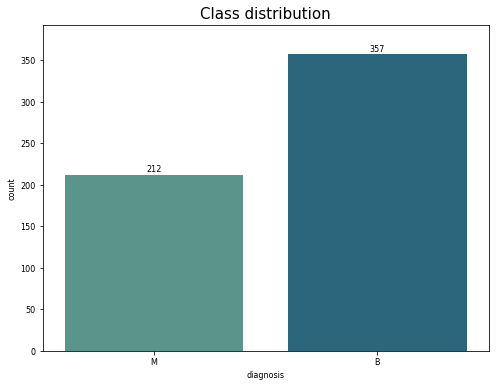

In [257]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data.diagnosis, palette='crest')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)

ax.set_title('Class distribution', fontsize = 15)

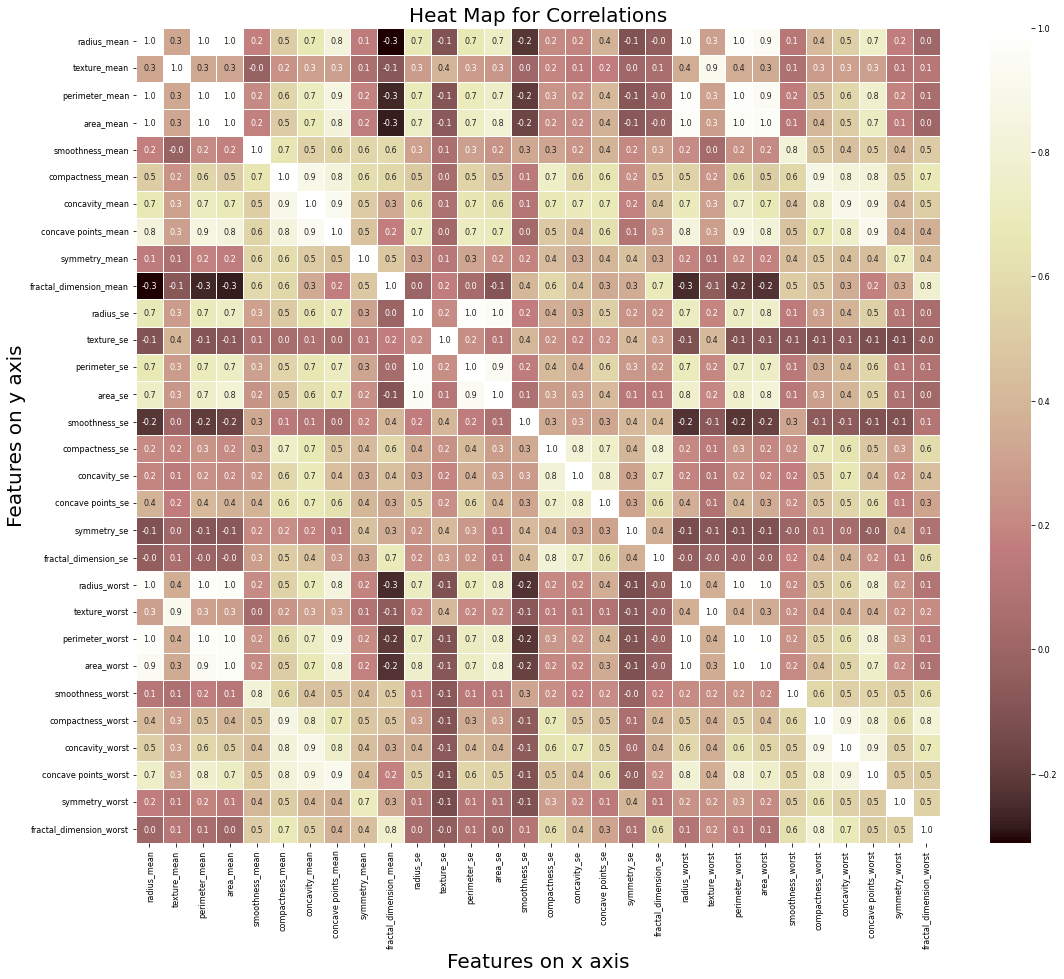

In [258]:
plt.rcParams['figure.figsize'] = (18, 15)
sns.heatmap(data.corr(), cmap = 'pink', annot = True, linewidths = 0.5, fmt = '.1f')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.ylabel("Features on y axis", fontsize = 20)
plt.xlabel("Features on x axis", fontsize = 20)
plt.show()

The correlation map shows the correlation between the various features with each other. As the colour becomes lighter, it shows a stronger correlation between the features. We see that radius_mean, radius_worst has the maximum correlation and multicollinearity with perimeter and area columns. 
Radius has 0.7 and 0.8 correlation with concavity and concave points. 

Text(0.5, 0.98, 'Relationship between Mean, SE, Worst Values of Radius')

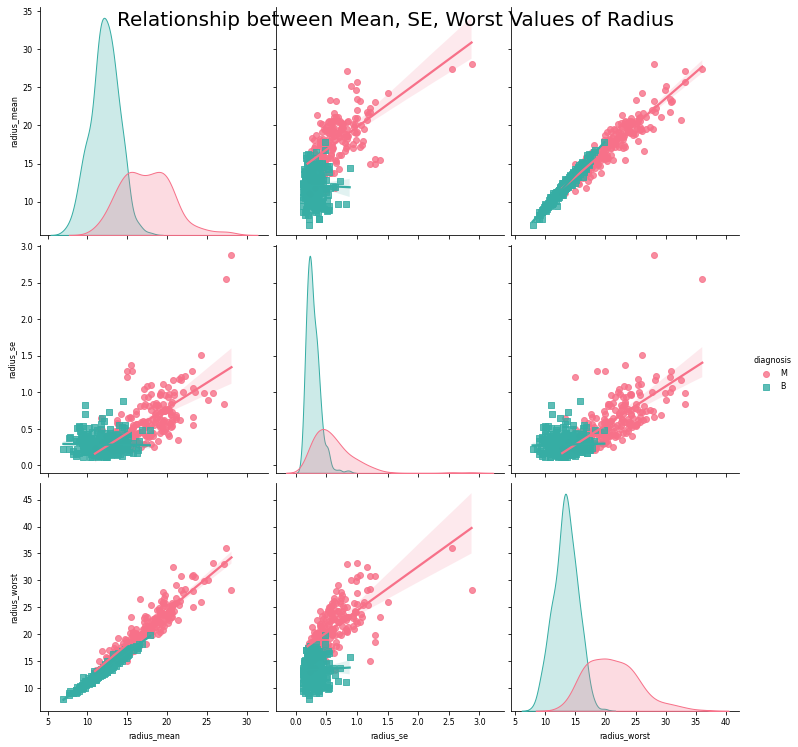

In [259]:
#checking the relationship between the mean, se and worst columns for each feature
radius = data[['radius_mean','radius_se','radius_worst','diagnosis']]
g = sns.pairplot(radius, hue='diagnosis',palette="husl", markers=["o", "s"],height=3.5, kind = "reg")
g.fig.suptitle('Relationship between Mean, SE, Worst Values of Radius', fontsize = 20)

There is positive linear slope between radius_mean with radius_se and radius_worst. However, the regression line is not accurate for the relationship between radius_se and radius_worst. 

The distribution of the radius for the two classes are quite different. Malignant class has larger radius which reaches a max value of 40. 

Text(0.5, 0.98, 'Relationship between Mean, SE, Worst Values of Texture')

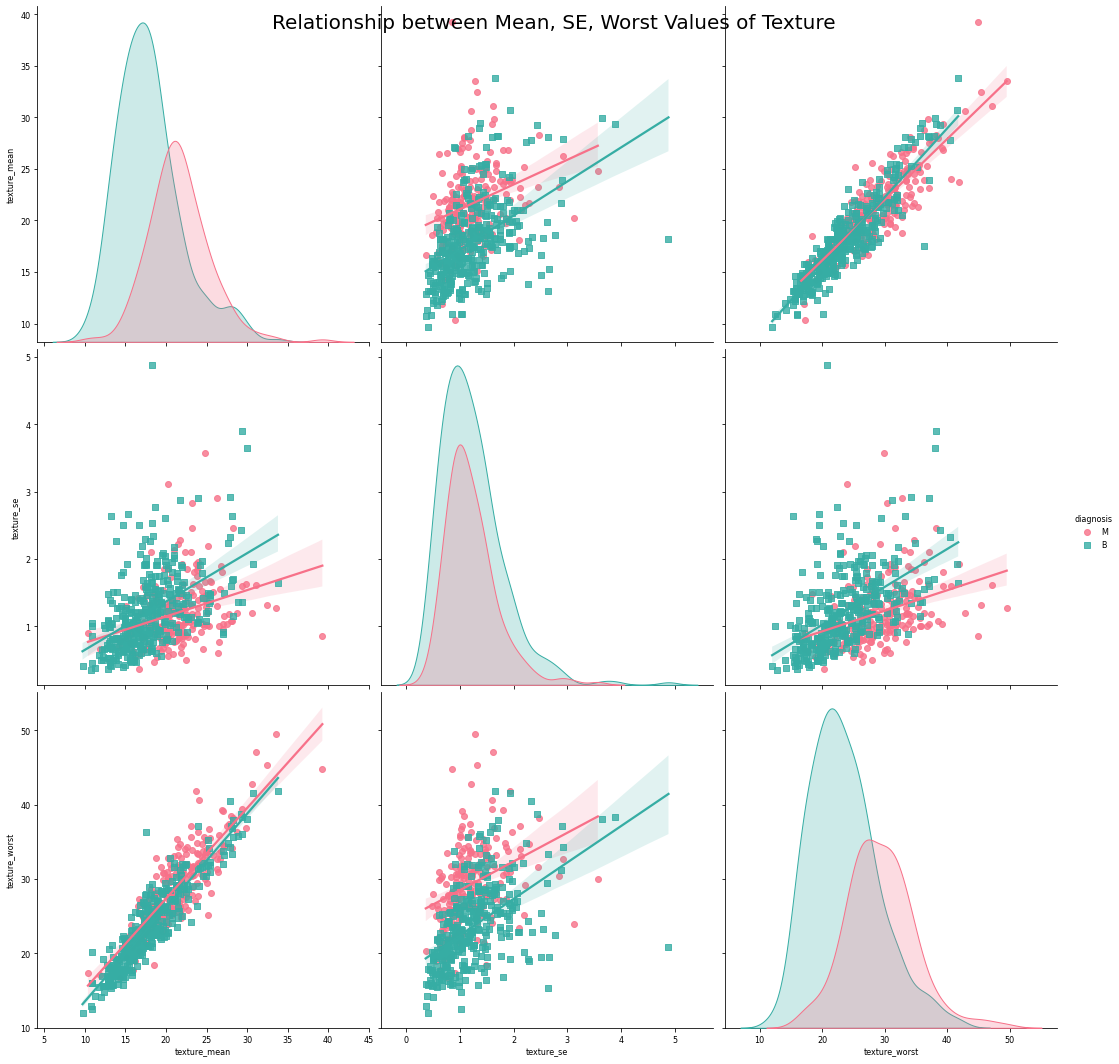

In [260]:
texture = data[['texture_mean','texture_se','texture_worst','diagnosis']]
g1 = sns.pairplot(texture, hue='diagnosis', palette="husl", height= 5, kind="reg", markers=["o", "s"])
g1.fig.suptitle('Relationship between Mean, SE, Worst Values of Texture', fontsize = 20)

Here we see that there are two different slopes for each of the class. But in all cases, texture_mean has positive linear slope with texture_se and texture_worst. While the mean texture and worst texture values are in a bit higher range for malignant tumors, the se values overlap for both the classes. 

Text(0.5, 0.98, 'Relationship between Mean, SE, Worst Values of Perimeter')

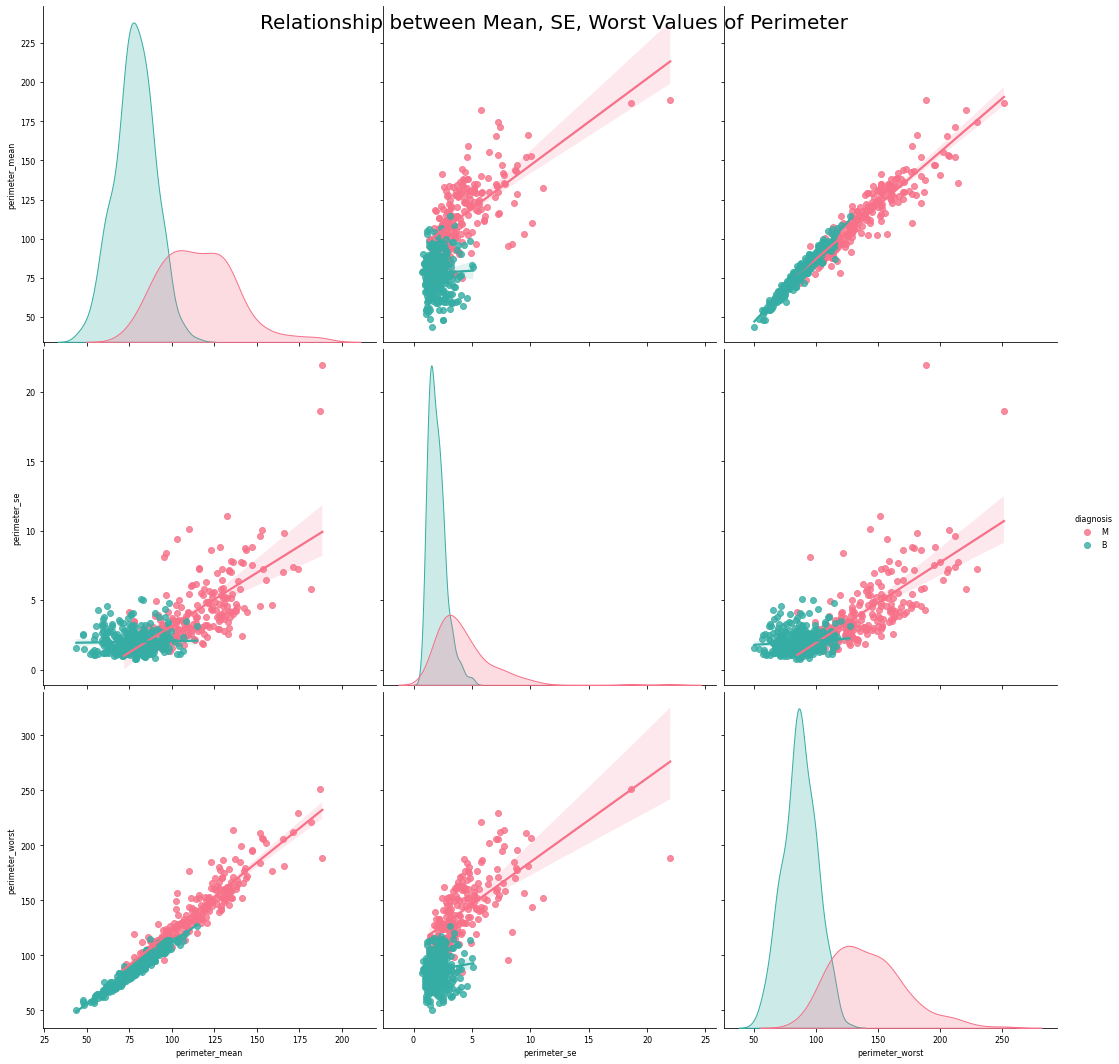

In [261]:
perimeter = data[['perimeter_mean','perimeter_se','perimeter_worst','diagnosis']]
g2 = sns.pairplot(perimeter, hue='diagnosis', palette="husl", height = 5, kind="reg")
g2.fig.suptitle('Relationship between Mean, SE, Worst Values of Perimeter', fontsize = 20)

The distribution of the perimeter for the two classes are quite different. Malignant class have larger perimeters which reaches a max value of over 250 units and this can be linked to the distribution of the radius values as well. 

Text(0.5, 0.98, 'Relationship between Mean, SE, Worst Values of Area')

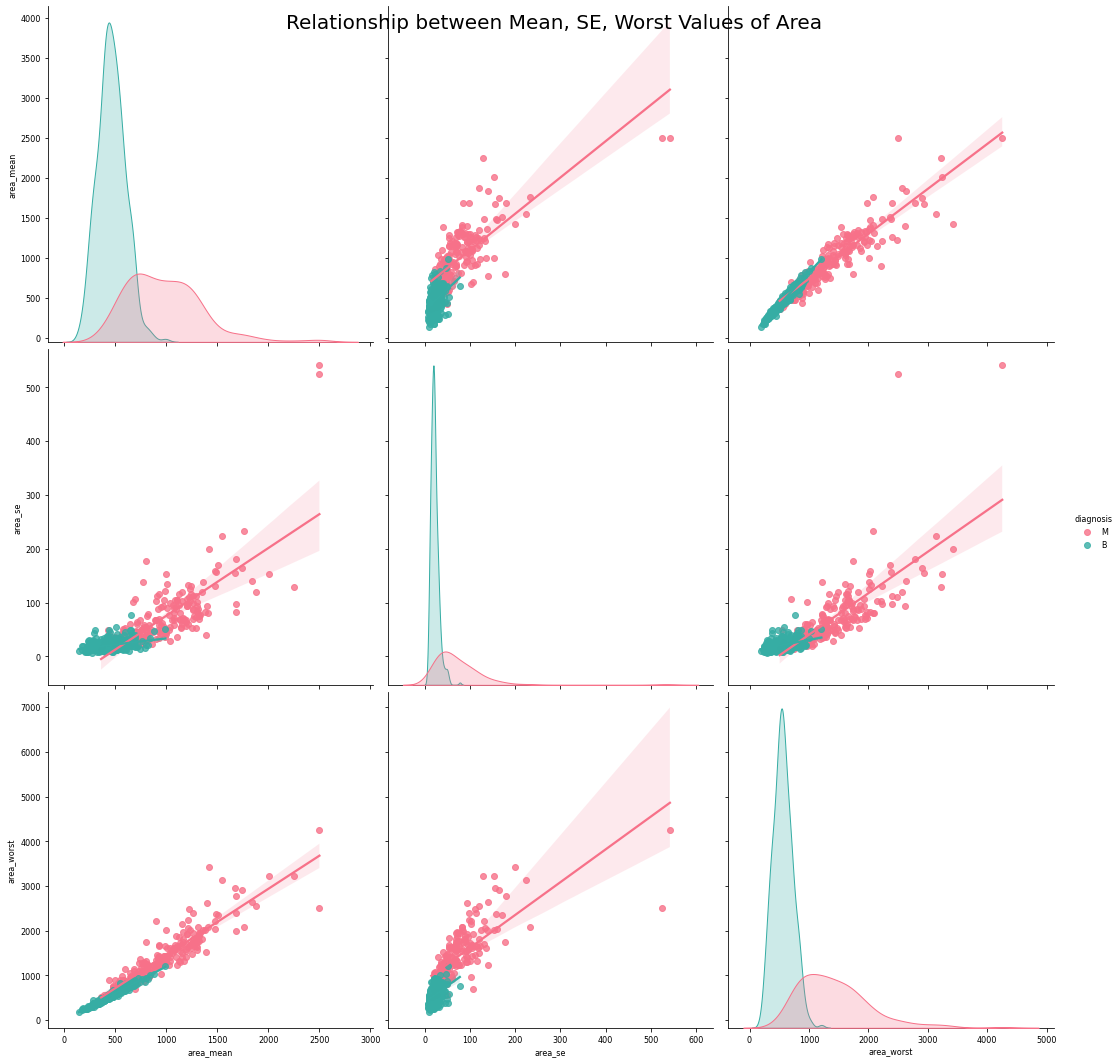

In [262]:
area = data[['area_mean','area_se','area_worst','diagnosis']]
g3 = sns.pairplot(area, hue='diagnosis', palette="husl", height = 5, kind="reg")
g3.fig.suptitle('Relationship between Mean, SE, Worst Values of Area', fontsize = 20)

Again we see that while there is positive linear slope, we also see the difference in the area values for the malignant and benign tumours. all the points for the benign class are in the smaller values of area. 

Text(0.5, 0.98, 'Relationship between Mean, SE, Worst Values of Smoothness')

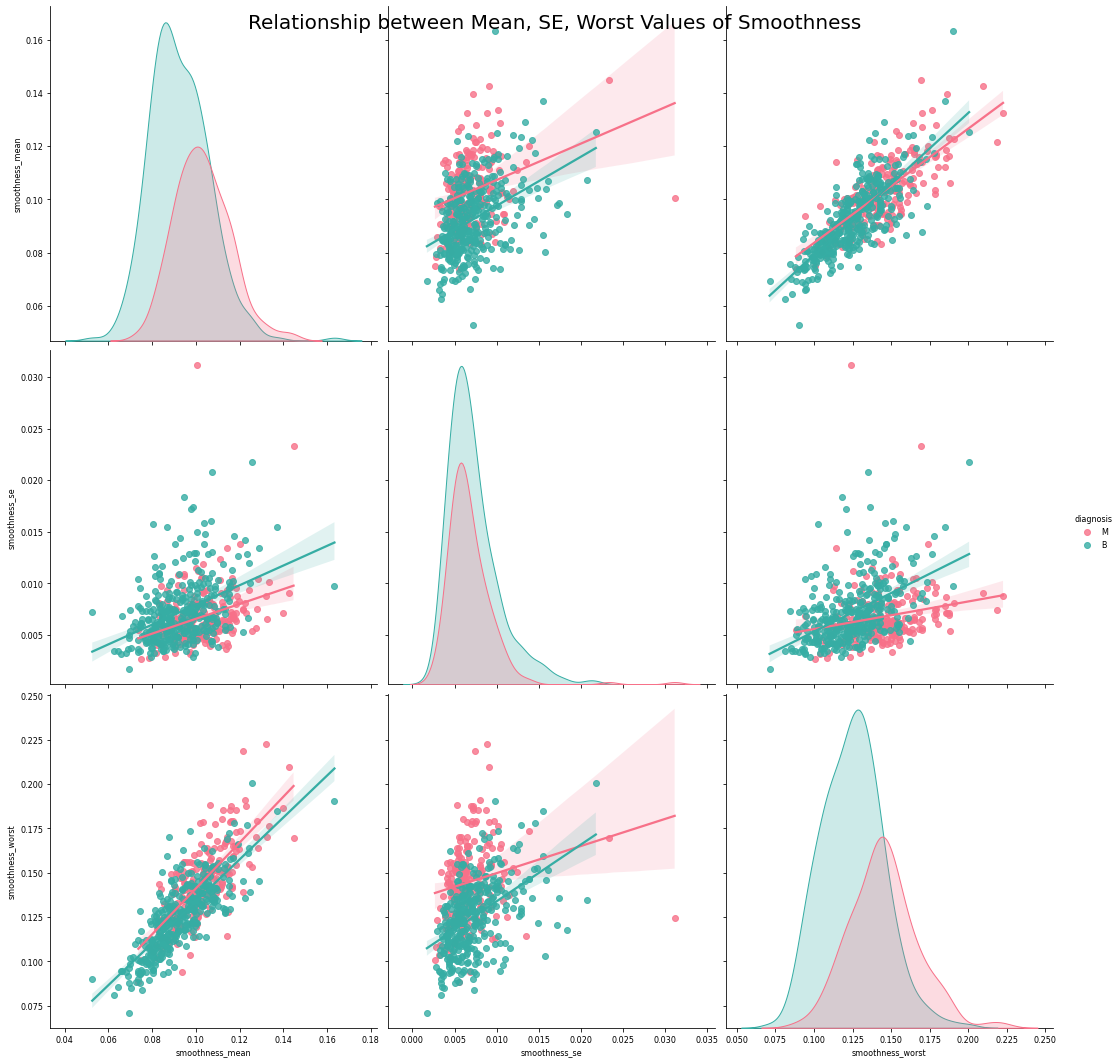

In [263]:
smoothness = data[['smoothness_mean','smoothness_se','smoothness_worst','diagnosis']]
g5 = sns.pairplot(smoothness, hue='diagnosis', palette="husl", height = 5, kind="reg")
g5.fig.suptitle('Relationship between Mean, SE, Worst Values of Smoothness', fontsize = 20)

For smoothness, we see that the slopes vary a lot for the two classes in the relationship between mean, se and worst values. 
Whereas, the smoothness does not vary a lot for the two classes. The plots are overlapping for the two classes of tumors - which shows that smoothness may not be a distinguishing factor. 

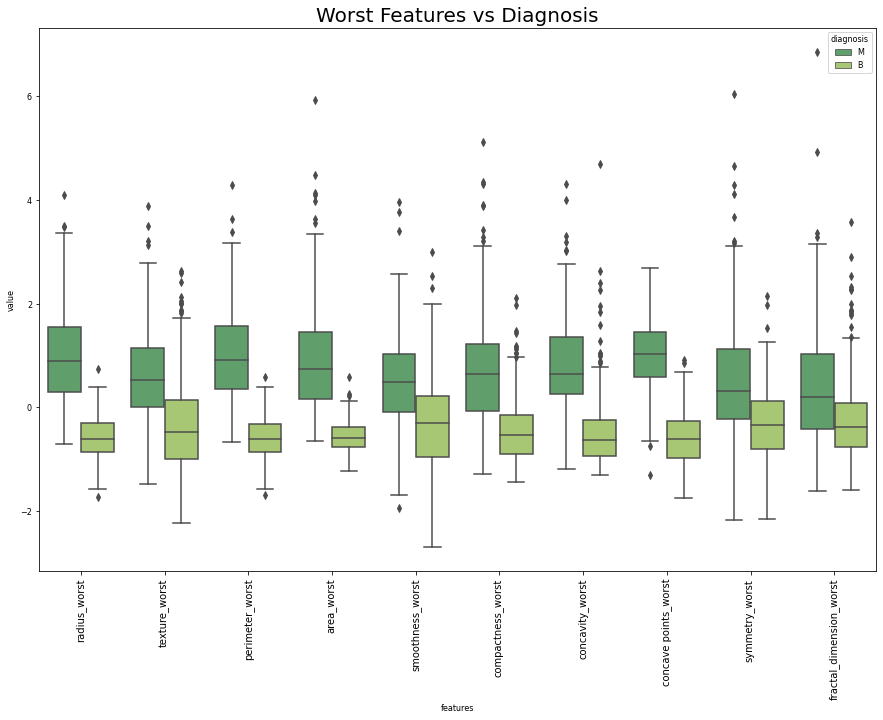

In [264]:
y = data['diagnosis']
x = data.drop('diagnosis', axis = 1)

#normalising the feature values
x = (x - x.mean()) / (x.std()) 

#taking se values only
df = pd.concat([y, x.iloc[:,20:30]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=df, palette = 'summer')
plt.title('Worst Features vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90, fontsize = 10)
plt.show()

For both the classes, I have plotted boxplot to check the worst values for all the features. In every feature, we see that the average worst value of malignant is mugh higher than the benign class. The only exception is the smoothness where are values are pretty close to each other for both the classes as well as fractal dimensions. These two features are not very significant contributors in identifying the difference between the two classes of tumors.

/Users/venkatsrinidhivaddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



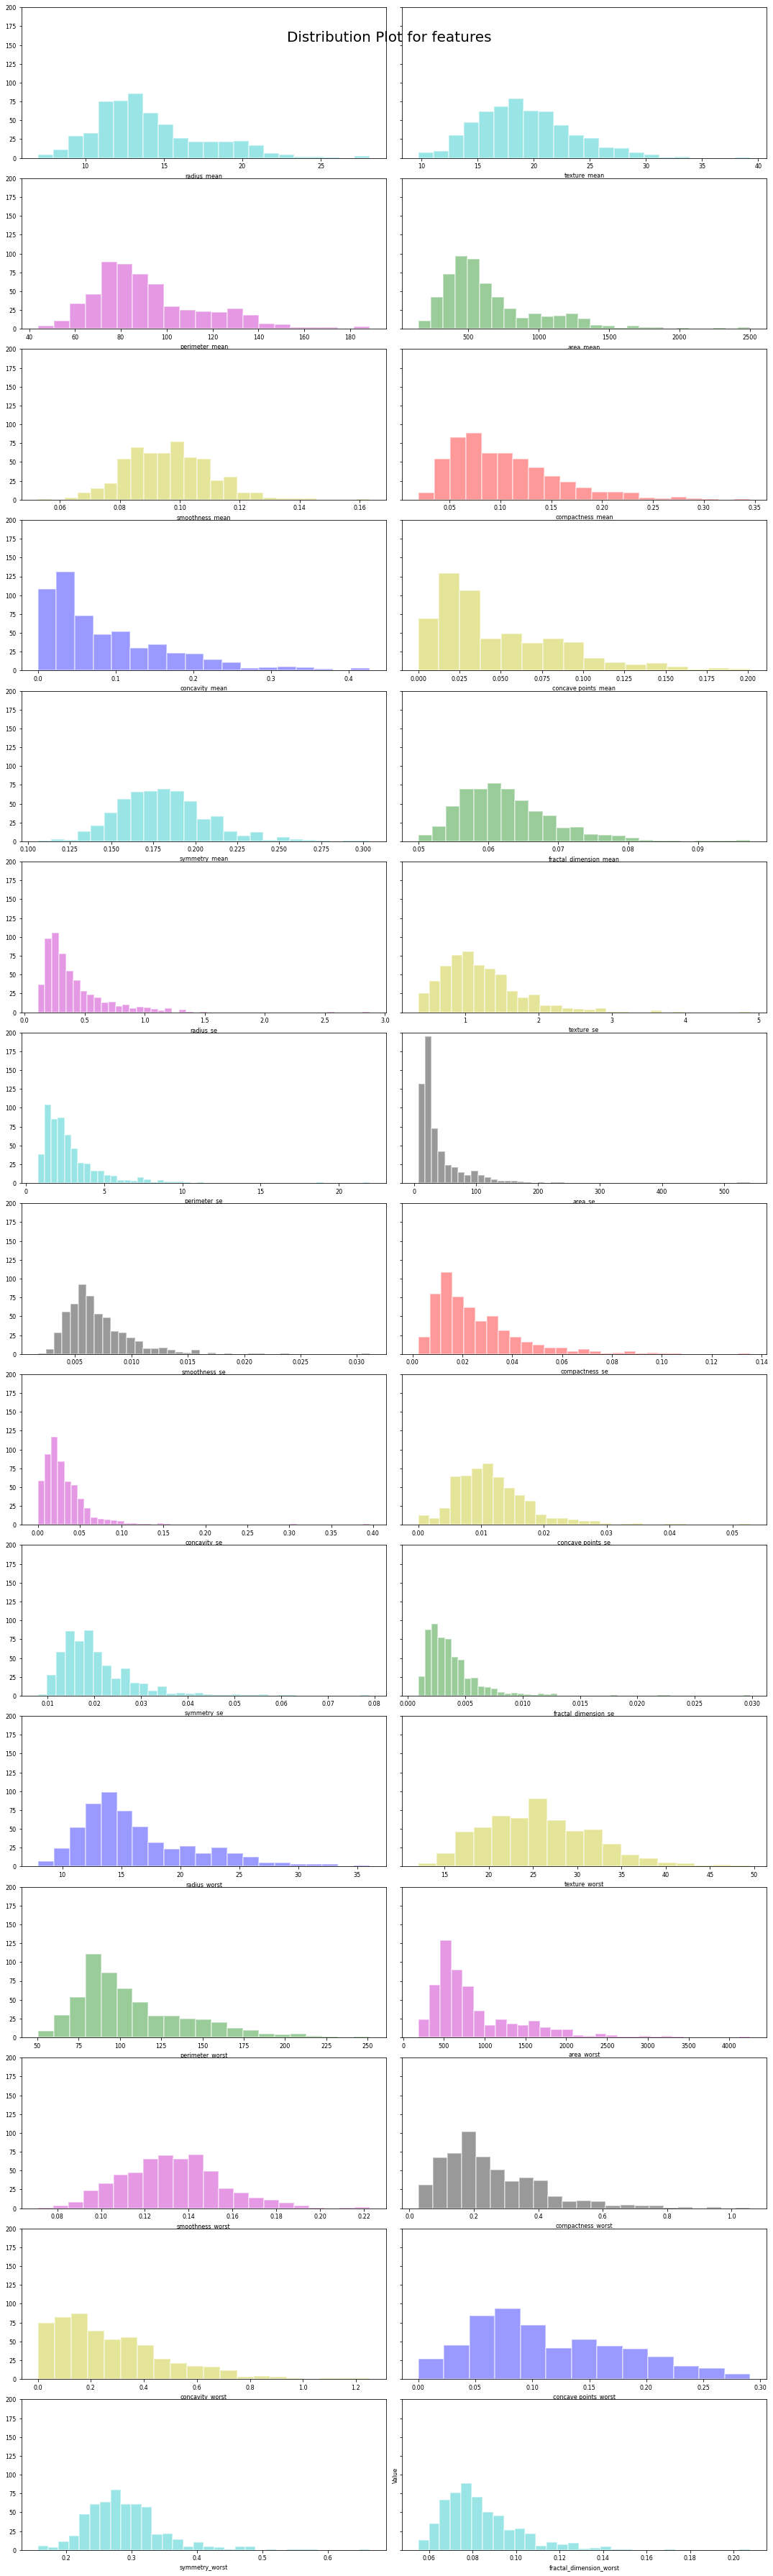

In [265]:
#distribution plots

# Move the reponse variable "diagnosis" to the end of the dataframe
df = data
end = df['diagnosis']
df.drop(labels=['diagnosis'], axis=1,inplace = True)
df.insert(30, 'diagnosis', end)
df.head()

#converting to categorical
def categorical_to_numeric_diagnosis(x):
    if x=='M':
        return 1
    if x=='B':
        return 0

df['diagnosis']= df['diagnosis'].apply(categorical_to_numeric_diagnosis)
df["diagnosis"].value_counts()



colors = np.array('b g r c m y k'.split()) #Different colors for plotting

#creating multiple subplots
fig,axes = plt.subplots(nrows =15,ncols=2, sharey=True,figsize = (15,50))
plt.suptitle("Distribution Plot for features",fontsize=20)

plt.tight_layout()


row = 0
iteration = 0
#accessing all except response variable
for j in range(0,len(df.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(df[df.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),color = np.random.choice(colors) ,ax=axes[row][k])
    plt.ylabel("Value")
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)
        

Most of the features have left skewed normal distribution but the se features are the most left skewed. 
A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That's because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

### Q.4 CONTINUED Using the data you chose and the algorithm you chose, read in your data and run your model. (6pts)

#### Running the model


##### Preprocessing the data

In [269]:
y = data['diagnosis']
x = data.drop('diagnosis', axis = 1)

# label encoding of the dependent variable
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# performing label encoding
le = LabelEncoder()
y= le.fit_transform(y)

y[1:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [270]:
#splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 16)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)

Shape of x_train : (426, 30)
Shape of x_test : (143, 30)


In [271]:
# standard scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_scale = sc.fit_transform(x_train)
x_test_scale = sc.fit_transform(x_test)

#### LOGISTIC REGRESSION

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score


#LOGISTIC REGRESSION
# creating the model
model = LogisticRegression()

# feeding the training data into the model
model.fit(x_train_scale, y_train)

# predicting the test set results
y_pred = model.predict(x_test_scale)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train_scale, y_train))
print("Testing accuarcy :", model.score(x_test_scale, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 0.9882629107981221
Testing accuarcy : 0.965034965034965
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.96      0.94      0.95        52

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

[[89  2]
 [ 3 49]]


Logistic Regression is the simplest model and it has given an accuracy of 98.8% and 96.5% on training and testing data respectively. 

### DECISION TREE

In [273]:
from sklearn.tree import DecisionTreeClassifier

# creating a model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 1.0
Testing accuarcy : 0.965034965034965
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        91
           1       0.98      0.92      0.95        52

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

[[90  1]
 [ 4 48]]


The decision tree has performed approximately similar to the Logistic Regression model. It has generated a training accuracy of 1 but 96.5% on the testing dataset, which means that the model overfit to the training data. 

### RANDOM FOREST - MAIN MODEL

In [274]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier(n_estimators = 400, max_depth = 10)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 1.0
Testing accuarcy : 0.9790209790209791
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        91
           1       0.98      0.96      0.97        52

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[90  1]
 [ 2 50]]


In [275]:
model

RandomForestClassifier(max_depth=10, n_estimators=400)

The Random Forest Classifier is performing the best on the testing data and has produced the highest accuracy of 97.9% on the testing dataset, while it did overfit on the training data with an accuracy of 1. This could be because of the very high number of n_estimators. Hypertuning the paramters might produce better results. 


### Q.5 Tinker with parameters at least 3 times (changing learning rate, changing features, changing k like in KNN, etc). You may tinker with the same kind of parameter 3 times, it doesn't have to be 3 different parameters. (example: you can just tinker with k. k=1, k=3, or k=8) Or you might want to tinker with features and also your k value or whatever is appropriate for your algorithm. (3pts)

### TINKERING WITH DECISION TREE

#### Changing the max_depth values as 3, 15, 100 and then changing max_depth values along with max_leaves_nodes values as 8,10,20. 

In [276]:
#MAX DEPTH AS 3
# creating a model
model_1 = DecisionTreeClassifier(max_depth = 3)

# feeding the training set into the model
model_1.fit(x_train, y_train)

# predicting the test set results
y_pred = model_1.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model_1.score(x_train, y_train))
print("Testing accuarcy :", model_1.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 0.9741784037558685
Testing accuarcy : 0.9090909090909091
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        91
           1       0.87      0.88      0.88        52

    accuracy                           0.91       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143

[[84  7]
 [ 6 46]]


In [277]:
#MAX DEPTH AS 15
# creating a model
model_1 = DecisionTreeClassifier(max_depth = 15)

# feeding the training set into the model
model_1.fit(x_train, y_train)

# predicting the test set results
y_pred = model_1.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model_1.score(x_train, y_train))
print("Testing accuarcy :", model_1.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 1.0
Testing accuarcy : 0.958041958041958
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        91
           1       0.96      0.92      0.94        52

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

[[89  2]
 [ 4 48]]


In [278]:
#MAX DEPTH AS 100
# creating a model
model_2 = DecisionTreeClassifier(max_depth = 100)

# feeding the training set into the model
model_2.fit(x_train, y_train)

# predicting the test set results
y_pred = model_2.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model_2.score(x_train, y_train))
print("Testing accuarcy :", model_2.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 1.0
Testing accuarcy : 0.958041958041958
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        91
           1       0.96      0.92      0.94        52

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

[[89  2]
 [ 4 48]]


In [279]:
#MAX DEPTH AS 3 AND MAX LEAF NODES AS 8

# creating a model
model_3 = DecisionTreeClassifier(max_depth = 3, max_leaf_nodes=8)

# feeding the training set into the model
model_3.fit(x_train, y_train)

# predicting the test set results
y_pred = model_3.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model_3.score(x_train, y_train))
print("Testing accuarcy :", model_3.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 0.9741784037558685
Testing accuarcy : 0.9090909090909091
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        91
           1       0.87      0.88      0.88        52

    accuracy                           0.91       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143

[[84  7]
 [ 6 46]]


In [280]:
#MAX DEPTH AS 50 AND MAX LEAF NODES AS 10
# creating a model
model_3 = DecisionTreeClassifier(max_depth = 50, max_leaf_nodes=10)

# feeding the training set into the model
model_3.fit(x_train, y_train)

# predicting the test set results
y_pred = model_3.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model_3.score(x_train, y_train))
print("Testing accuarcy :", model_3.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 0.9882629107981221
Testing accuarcy : 0.9230769230769231
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        91
           1       0.87      0.92      0.90        52

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

[[84  7]
 [ 4 48]]


In [282]:
#MAX DEPTH AS 50 AND MAX LEAF NODES AS 20

# creating a model
model_3 = DecisionTreeClassifier(max_depth = 50, max_leaf_nodes=20)

# feeding the training set into the model
model_3.fit(x_train, y_train)

# predicting the test set results
y_pred = model_3.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model_3.score(x_train, y_train))
print("Testing accuarcy :", model_3.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 1.0
Testing accuarcy : 0.951048951048951
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        91
           1       0.94      0.92      0.93        52

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

[[88  3]
 [ 4 48]]


### TINKERING WITH RANDOM FOREST

#### Passing 20 different n_estimator values from 5 to 100 with a depth of 3

In [283]:

# Go through different n_estimator
from sklearn import tree, ensemble

results_list = []
for n_estimator in range(5,100,5):
    np.random.seed(100)
    depth = 3
    clf_rf = ensemble.RandomForestClassifier(
        n_estimators= n_estimator,
        max_depth = depth)
    accuracy_results = cross_val_score(clf_rf, x, y, cv=5, scoring = "accuracy")
    results_list.append([n_estimator, 100 * np.mean(accuracy_results)])
df_results_list_rf = pd.DataFrame(results_list, columns=["n_estimator", "Acc"])

In [284]:
df_results_list_rf

,n_estimator,Acc
0,5,94.030430
1,10,93.851886
2,15,94.729079
3,20,95.784816
4,25,95.430834
5,30,94.730632
6,35,94.906070
7,40,95.081509
8,45,95.256948
9,50,95.256948


Text(0, 0.5, 'Accuracy %')

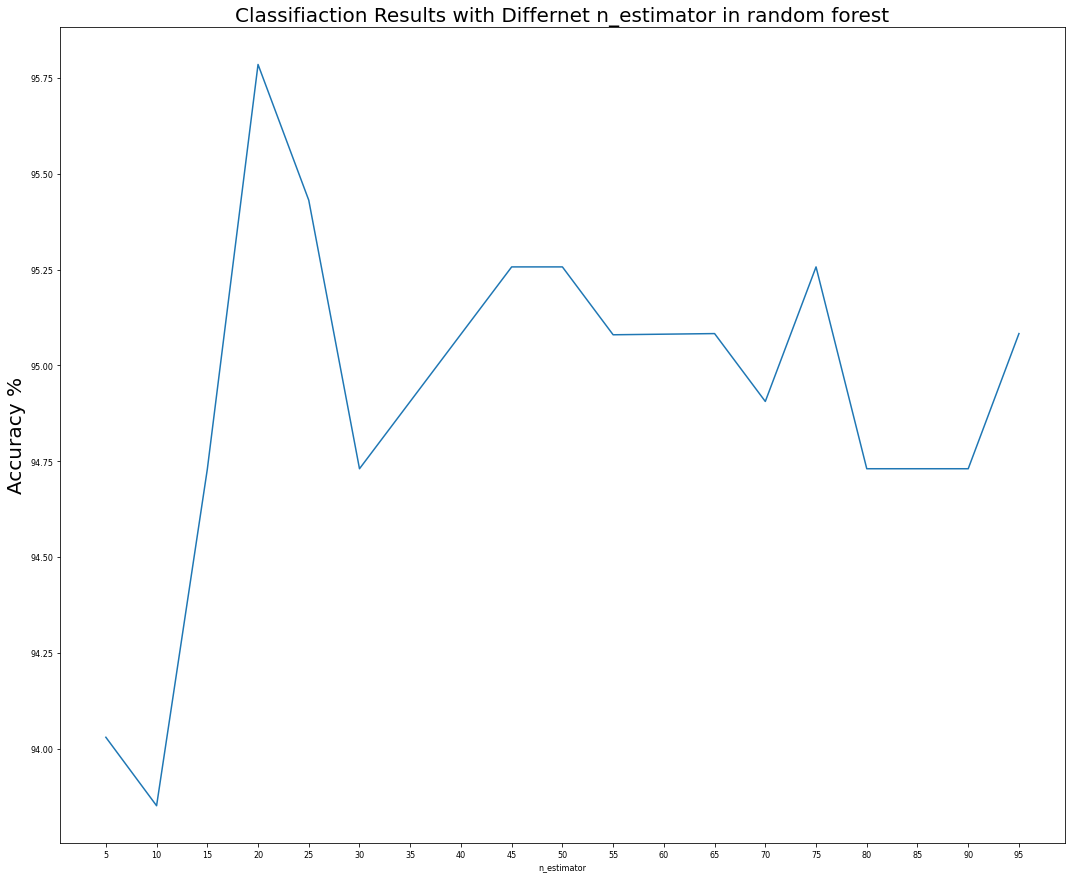

In [285]:
# Visualization

fig, ax = plt.subplots()
df_results_list_rf.set_index("n_estimator")["Acc"].plot(ax = ax)
ax.set_title("Classifiaction Results with Differnet n_estimator in random forest", fontsize = 20)
ax.set_xticks(list(range(5,100,5)))
ax.set_ylabel("Accuracy %", fontsize = 20)

In [286]:
clf_rf

RandomForestClassifier(max_depth=3, n_estimators=95)

In [287]:
df_results_list_rf.Acc.max()

95.78481602235678

#### Passing 20 different n_estimator values from 5 to 100 with a depth of 10

In [288]:
# Go through different n_estimator
from sklearn import tree, ensemble

results_list = []
for n_estimator in range(5,200,5):
    np.random.seed(100)
    depth = 10
    clf_rf = ensemble.RandomForestClassifier(
        n_estimators= n_estimator,
        max_depth = depth)
    accuracy_results = cross_val_score(clf_rf, x, y, cv=5, scoring = "accuracy")
    results_list.append([n_estimator, 100 * np.mean(accuracy_results)])
df_results_list_rf = pd.DataFrame(results_list, columns=["n_estimator", "Acc"])

Text(0, 0.5, 'Accuracy %')

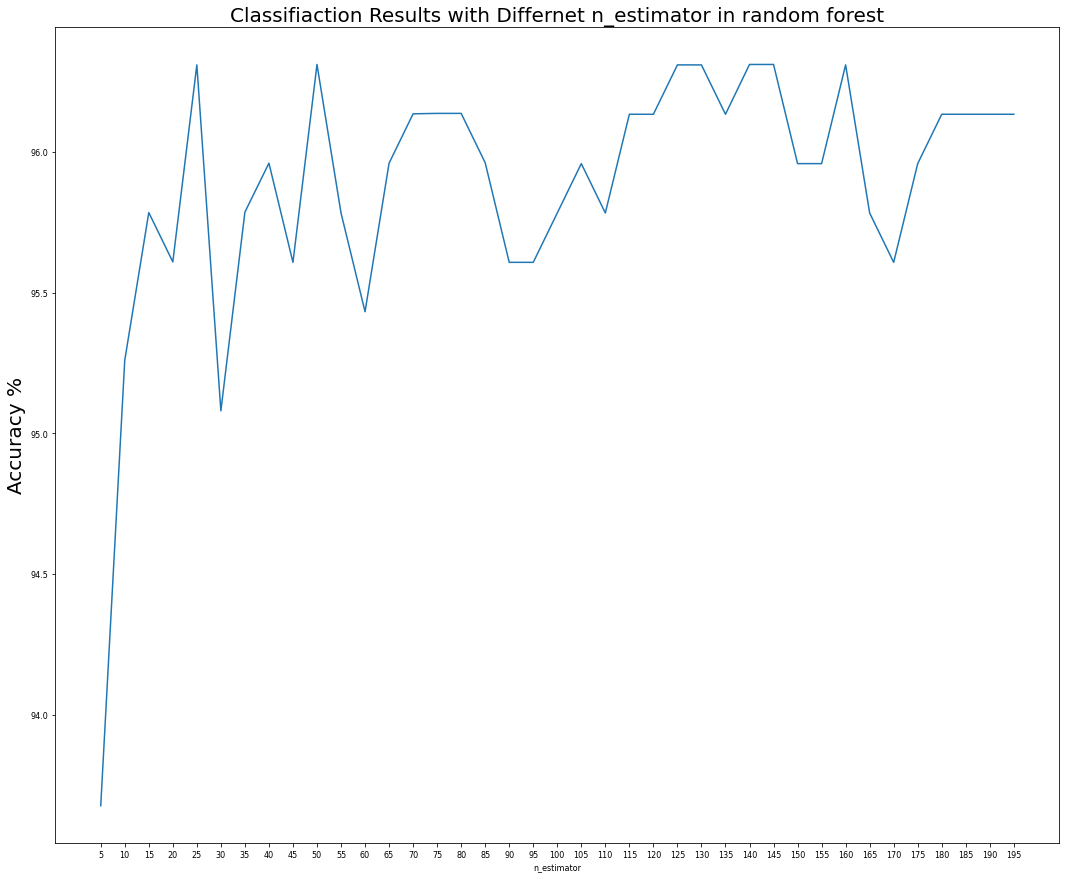

In [289]:
# Visualization

fig, ax = plt.subplots()
df_results_list_rf.set_index("n_estimator")["Acc"].plot(ax = ax)
ax.set_title("Classifiaction Results with Differnet n_estimator in random forest", fontsize = 20)
ax.set_xticks(list(range(5,200,5)))
ax.set_ylabel("Accuracy %", fontsize = 20)


In [290]:
clf_rf

RandomForestClassifier(max_depth=10, n_estimators=195)

In [291]:
df_results_list_rf.Acc.max()

96.31113181183046

### Q.6 Report the accuracy of your model. Either through RMSE or another metric. How did accuracy change with your parameter tinkering? (3pts)



#### DECISION TREE:

At a low max_depth of 3, the decision tree performed poorly and gave a testing accuracy of 90%. With max_depth increased to 15 and then 100, the testing accuracy was 95.1% and 95.8% respectively. While by increasing the depth of the tree, the testing accuracy increased, the model did overfit while training and gave training accuracy of 1. 

The accuracy is computed using the classification report, confusion matrix and score metric from the sklearn.metrics library. 

When the max_depth was 3 and max_leaf_nodes was 8, both low, the accuracy was low for both the training and testing accuracy. Tuning the paramters, improved the accuracy. I got imporved accuracy of 98% and 92% for training and testing datasets after tuning the parameters to higher values of max_depth = 50 and max_leaf_nodes = 10. 

Making this 100 and 20 respectively, the training accuracy became 1, which shows overfitting. The testing accuracy reached the highest of 95.8%. 


#### RANDOM FOREST:

In a loop, changing the number of estimators from 5 to 100 at max_depth of 3, we see that the maximum accuracy is at n_estimator = 95 with accuracy of 95.78%. By tinkering, we have lowered the accuracy. Initially we got 97.9% with max_depth = 10 and 400 estimators. 

In a loop, changing the number of estimarots from 5 to 200 at max_depth of 10, we see maximum accuracy of 96.31% with n_estimator as 195. '

In random forest, by increasing the max_depth and n_estimators, we are getting higher testing accuracy. 

### Q.7 What challenges did you run into? Do you think it was because of the data, the model, the research question? How would you overcome these challenges? (4pts)

The first challenge was with the basic understanding of the data. The data has 3 columns for each of the features. It was important to understand what each column meant. Such as the se columns have the values of the standard error in the values of the each feature. The worst column has the mean of the three largest values of radius for each observation. 

The second challenge was picking the model. Since the values of the radius, area, perimeter and others vary a lot, they all have to be scaled for most of the models like Logistic Regression to get better accuracy and not be influenced by larger features. Decision Tree and Random Forest seem better choices of models because they give differential weightage to the inputs basis how important they are in the prediction and the accuracy isn't effected by scaling. 



### Q.8 We learned a little bit about how our models can affect real people in the world. Name 2 potential benefits of your model and 2 potential harms. You can even look at the Wikipedia page on Algorithmic Bias (Links to an external site.) for inspiration. Every model has consequences, what can you think of? If your data is really not amenable to this question, simply write about any other example we covered in class, such as the Boston housing dataset or hate speech detectors. (6pts)

Benefits of Decision Tree and Random Forest for this particular Dataset:
Easy to interpret
Works well with data even without scaling 
Provides better accuracy than other classification models like SVC, Logistic Regression

Cons:
It can't always guarantee the optimal tree. 
As we saw in the result, the model is prone to overfitting and will require pruning. 

One of the possible algorithmic bias that we can see here as well is increase in the bias. Random Forests uses Bootstrap sampling, and this increases bias in the single tree. Furthermore, as the Random Forest method limits the allowed variables to split on in each node, the bias for a single random forest tree is increased even more.

EXAMPLE OF BOSTON HOUSING DATA: the boston dataset has the problematic and incorrect 'B' feature which discriminates against black population by adjusting prices of houses according to the black population. This is calculated using the formula B = 1000(Bk – 0.63)2 where Bk is the proportion of Blacks/African Americans per town according to the census.Due to this, data explorations such as measuring correlations between the variables show relation between house price and the proportion of African Americans in a given area or rather very disturbingly a relation between crime and the proportion of African Americans in an area. 


### Q.9 Name one research question you might ask next for future work (don't worry, you don't have to do it!) Why is it important? (2pts)

While the current dataset used has the digitzed images where we get the values for all the different features, the next research question would be developing a model that will extract features directly from the images of the breast cancer tumors and classifying them as benign and malignant. This will use Convolutional Neural Networks as the possible model. 

It is important because digitizing the image to extract features and values is a time consuming complex job. With a cancer type disease, it is important to create a model which is quick in training and predicting. This new research question eliminates digitization step and directly takes the images as the input to work on. 



#### (3pts) for Jupyter Notebook presentation. Make sure your headings are legible, your answers are clear, and that it's easy to read!